### Need to classify SMS was a Ham or Spam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spam or ham.csv', engine= 'python')
data.head()

,mail type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['message'][:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [4]:
type(data['message'])

pandas.core.series.Series

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mail type  5572 non-null   object
 1   message    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isna().any()

mail type    False
message      False
dtype: bool

### EDA

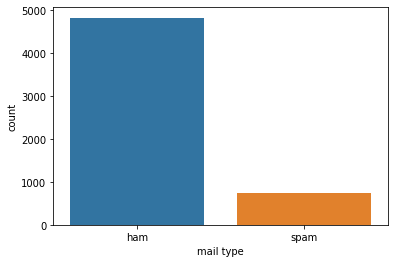

In [7]:
sns.countplot(x = 'mail type', data = data)
plt.show()

In [8]:
data['mail type'].value_counts()

ham     4825
spam     747
Name: mail type, dtype: int64

- Here we are dealing with class imbalance so we can try **resampling techniques** so please checkout them

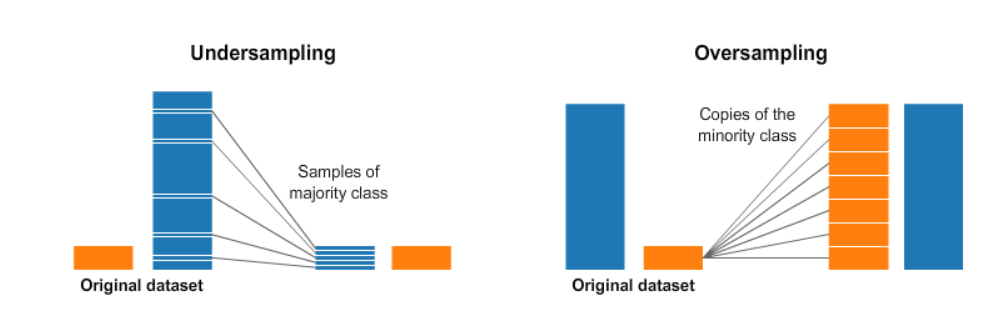

In [9]:
data['mail type'] = [1 if i == 'ham' else 0 for i in data['mail type']]

In [10]:
data['mail type'].value_counts()

1    4825
0     747
Name: mail type, dtype: int64

### Data Cleaning & Preprocessing
Preprocessing steps:
         1. convert into lowercase
         2. remove numbers
         3. remove special characters
         4. remove stop words
         5. stemming and lematization
         6. remove white spaces
         7. create DTM/TDM



In [11]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = [] # corpus is a collection of documents
ps = PorterStemmer()


for i in range(0, data.shape[0]):
    text = re.sub(pattern= "[^a-zA-Z]", repl = " ", string = data.message[i])               # remove special charecters and numbers
    text = text.lower()                                                                     # convert lower
    text = text.split()                                                                     # split into words
    text = [words for words in text if words not in set(stopwords.words('english'))]        # remove stop words
    text = [ps.stem(words) for words in text]                                               # stemming
    text = ' '.join(text)                                       
    corpus.append(text)



In [13]:
corpus[:20]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### Bag of words

In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(data['mail type'])
y = y.iloc[:, 1].values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

### Model Building

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
print("Training score: {}".format(classifier.score(X_train, y_train)))
print("Test score: {}".format(classifier.score(X_test, y_test)))

Training score: 0.9890060578864707
Test score: 0.9856502242152466


In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Model Evaluation

In [20]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.57%
Precision score is: 0.99
Recall score is: 0.99


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   7],
       [  9, 946]], dtype=int64)

In [22]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Users\LOKESH\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score for alpha=0.0 is: 98.3%
Accuracy score for alpha=0.1 is: 98.39%
Accuracy score for alpha=0.2 is: 98.57%
Accuracy score for alpha=0.3 is: 98.83%
Accuracy score for alpha=0.4 is: 98.83%
Accuracy score for alpha=0.5 is: 98.83%
Accuracy score for alpha=0.6 is: 98.83%
Accuracy score for alpha=0.7 is: 98.83%
Accuracy score for alpha=0.8 is: 98.83%
Accuracy score for alpha=0.9 is: 98.65%
Accuracy score for alpha=1.0 is: 98.57%
--------------------------------------------
The best accuracy is 98.83% with alpha value as 0.3


In [23]:
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print('training score : {} and test score : {}'.format(classifier_RF.score(X_train,y_train),classifier_RF.score(X_test,y_test)))

training score : 0.9997756338344178 and test score : 0.9847533632286996


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   7],
       [  9, 946]], dtype=int64)

### Predictions

In [27]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [28]:
# Predicting values
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a normal message.


In [29]:
# Predicting values
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('This is a SPAM message!')
else:
    print('This is a normal message.')

This is a SPAM message!
